In [1]:
#Librerías estándar
import math
import random

#Básicas que se usan siempre
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FixedLocator
from matplotlib.ticker import LinearLocator
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import AutoLocator


#Machine learning & IA
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def axes_configure_labels(axes,title,xlabel,ylabel):
    color="#003B80"
    facecolor="#FAFCFF"
    gridcolor="#BAD4F2"
    tickcolor="#011E32"
    fontsize_label=13
 
    axes.set_xlabel(xlabel, fontsize=fontsize_label,color=color)
    axes.set_ylabel(ylabel, fontsize=fontsize_label,color=color)
    axes.set_title(title,color=color)
 
    axes.set_facecolor(facecolor)
    axes.spines['bottom'].set_color(tickcolor)
    axes.spines['top'].set_color(tickcolor)
    axes.spines['right'].set_color(tickcolor)
    axes.spines['left'].set_color(tickcolor)
    axes.tick_params(axis='both', colors=tickcolor)
 
    axes.grid(visible=True, which='major', axis='both',color=gridcolor,linewidth=1,zorder=-10)
    axes.set_axisbelow(True)
 
    handles, labels = axes.get_legend_handles_labels()
    if labels:
        axes.legend(fontsize=fontsize_label-2,labelcolor=color)


def compile_fit(capas,activation,last_activation,loss,optimizer,epochs,x_train, x_test, y_train, y_test,metrics=[]):

    input_dim=x_train.shape[1]

    np.random.seed(5)
    tf.random.set_seed(5)
    random.seed(5)
   
    model=Sequential()
    for index,neuronas_capa in enumerate(capas):
        if (index==0):
            model.add(Dense(neuronas_capa, activation=activation,input_dim=input_dim))
        elif (index==len(capas)-1):
            model.add(Dense(neuronas_capa, activation=last_activation))          
        else:
            model.add(Dense(neuronas_capa, activation=activation))

    model.compile(loss=loss,optimizer=optimizer,metrics=metrics)
   
    history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=epochs,verbose=False)

    return history,model


def plot_loss(axes,history,title):
    color=axes._get_lines.get_next_color()

    axes.plot(history.history['loss'],label=f"loss={history.history['loss'][-1]:.2f}",color=color,linestyle=':')
    axes.plot(history.history['val_loss'],label=f"Val loss={history.history['val_loss'][-1]:.2f}",color=color)

    axes_configure_labels(axes,title,"Épocas","Loss")
    axes.xaxis.set_major_locator(MaxNLocator(integer=True))
    axes.set_ylim(ymin=0,ymax=1.1) 



2025-02-02 18:34:41.211044: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-02 18:34:41.883836: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2025-02-02 18:34:42.374334: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-02 18:34:42.413253: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-02 18:34:42.413470: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

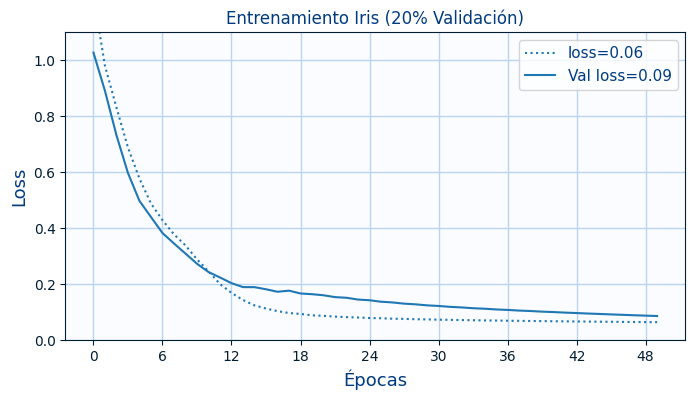

In [2]:


#Ejercicio 1
def get_datos_iris(test_size):
  datos=load_iris()
  x=datos.data
  y=datos.target
  label_binarizer = LabelBinarizer()
  label_binarizer.fit(range(max(y)+1))
  y = label_binarizer.transform(y)


  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

  return x_train, x_test, y_train, y_test



test_size=0.2
x_train, x_test, y_train, y_test=get_datos_iris(test_size)

capas=[5,10,15,3]
activation="swish"
last_activation="softmax"
loss="categorical_crossentropy"
optimizer=tf.keras.optimizers.Adam(learning_rate=0.008)
epochs=50

history_iris_2,model_iris_2=compile_fit(capas,activation,last_activation,loss,optimizer,epochs,x_train, x_test, y_train, y_test)

figure=plt.figure(figsize = (8, 4))
axes = figure.add_subplot()
plot_loss(axes,history_iris_2,"Entrenamiento Iris (20% Validación)")



(1797, 64) (1797,)


/home/logongas/Documentos/desarrollo/python_default_env/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


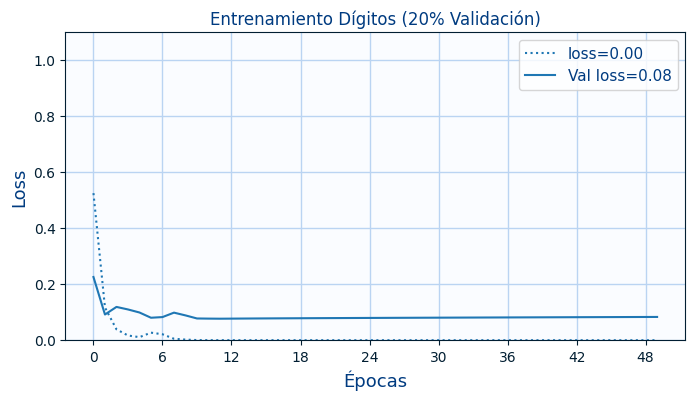

In [3]:
#Ejercicio 2

#Ejercicio 1
def get_datos_digits(test_size):
  datos=load_digits()
  x=datos.data
  y=datos.target
  print(x.shape,y.shape)

  label_binarizer = LabelBinarizer()
  label_binarizer.fit(range(max(y)+1))
  y = label_binarizer.transform(y)


  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

  return x_train, x_test, y_train, y_test



test_size=0.2
x_train, x_test, y_train, y_test=get_datos_digits(test_size)

capas=[128,256,512,256,128,10]
activation="swish"
last_activation="softmax"
loss="categorical_crossentropy"
optimizer=tf.keras.optimizers.Adam(learning_rate=0.0007)
epochs=50

history_digits_2,model_digits_2=compile_fit(capas,activation,last_activation,loss,optimizer,epochs,x_train, x_test, y_train, y_test)

figure=plt.figure(figsize = (8, 4))
axes = figure.add_subplot()
plot_loss(axes,history_digits_2,"Entrenamiento Dígitos (20% Validación)")


/home/logongas/Documentos/desarrollo/python_default_env/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


(1797, 64) (1797,)


/home/logongas/Documentos/desarrollo/python_default_env/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


En ambos casos en validación ha sido peor porque ha habido menos datos para entrenar.
Además en el caso de iris ha entrenado más lentamente.


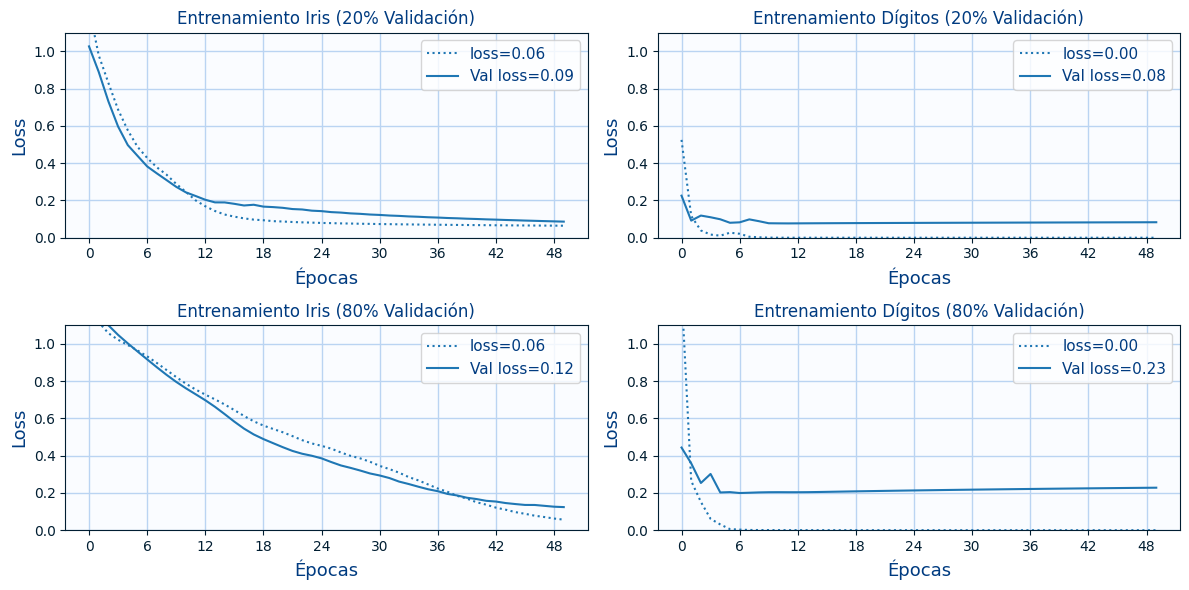

In [4]:
#Ejercicio 3
test_size=0.8
x_train, x_test, y_train, y_test=get_datos_iris(test_size)

capas=[5,10,15,3]
activation="swish"
last_activation="softmax"
loss="categorical_crossentropy"
optimizer=tf.keras.optimizers.Adam(learning_rate=0.008)
epochs=50
history_iris_8,model_iris_8=compile_fit(capas,activation,last_activation,loss,optimizer,epochs,x_train, x_test, y_train, y_test)


test_size=0.8
x_train, x_test, y_train, y_test=get_datos_digits(test_size)

capas=[128,256,512,256,128,10]
activation="swish"
last_activation="softmax"
loss="categorical_crossentropy"
optimizer=tf.keras.optimizers.Adam(learning_rate=0.0007)
epochs=50
history_digits_8,model_digits_8=compile_fit(capas,activation,last_activation,loss,optimizer,epochs,x_train, x_test, y_train, y_test)




figure=plt.figure(figsize = (12, 6))

axes = figure.add_subplot(2,2,1)
plot_loss(axes,history_iris_2,"Entrenamiento Iris (20% Validación)")

axes = figure.add_subplot(2,2,2)
plot_loss(axes,history_digits_2,"Entrenamiento Dígitos (20% Validación)")

axes = figure.add_subplot(2,2,3)
plot_loss(axes,history_iris_8,"Entrenamiento Iris (80% Validación)")

axes = figure.add_subplot(2,2,4)
plot_loss(axes,history_digits_8,"Entrenamiento Dígitos (80% Validación)")

figure.tight_layout()


print("En ambos casos en validación ha sido peor porque ha habido menos datos para entrenar.")
print("Además en el caso de iris ha entrenado más lentamente.")